 # NYC Airbnb - How much does it cost to rent an AirBnb apartment in NYC??
 ## In this project, I will try to predict the median price of apartment or room rental in each NYC

<B><font size = 3>Import useful libraries:

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

<B><font size=3>Upload the data:

In [19]:
data = pd.read_csv(r'C:\Users\meirk\Desktop\AB_NYC_2019.csv')

In [20]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [21]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Exploring the Data

<br><B>lets look at the columns:

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [23]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<B>Identifying NaN values:

In [24]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see, some columns have NaN vlues. we'll take care of them later.

### Explanation of columns:
**id:** property serial numbe.  
**name:** description of the property.  
**host_id:** host serial number.  
**host_name:** name of the owner of the property, the host.  
**neighbourhood_group:** in which quarter the property is located.  
**neighbourhood:** in which neighbourhood the property is located. 
<br>**latitude:** latitude location of the proplerty.
<br>**longitude:** longitude location of the property.  
**longitude and latitude are both represent the loction of the property.**  
**room_type:** the type of the property (room, apartment ect.).  
**price:** how much money the host require for renting.<br>
**minimum_nights:** the minimal number of nights the renter must pay for.  
**number_of_reviews:** how many reviews were wrriten about this property.  
**last_review:** when did the last review was written.
<br>**reviews_per_month:** how many reviews were written on average.  
**calculated_host_listings_count:** how many times host's properties   where ranted.
**avaliability_365:** number of days when listing is available.

How many apartments\rooms are aviable in each neighbourhood:

,how many
Manhattan,21661
Brooklyn,20104
Bronx,1091
Staten Island,373
Queens,5666


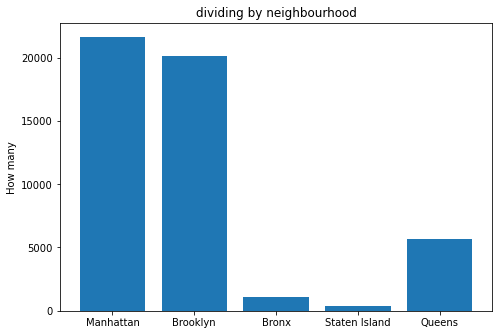

In [25]:
nighe_ = data.groupby('neighbourhood_group')
manhattan_count = nighe_.get_group('Manhattan')['id'].count()
brooklyn_count = nighe_.get_group('Brooklyn')['id'].count()
bronx_count = nighe_.get_group('Bronx')['id'].count()
statisland_count = nighe_.get_group('Staten Island')['id'].count()
queens_count = nighe_.get_group('Queens')['id'].count()

nigheList = ['Manhattan','Brooklyn', 'Bronx', 'Staten Island', 'Queens']
how_many = [manhattan_count, brooklyn_count, bronx_count, statisland_count, queens_count]

fig = plt.figure()
axs = fig.add_axes([0,0,1,1])
axs.bar(nigheList,how_many)
axs.set_ylabel('How many')
axs.set_title('dividing by neighbourhood')

df = pd.DataFrame(how_many,nigheList, columns= {'how many'})
df

As we can see, Manhattan has the largest amount of avaiable rooms with 21,661 avaiable rooms when Staten Island has the smallest amount of avaiable rooms with only 373!

<B>Mean price:

In [71]:
mean_price = data['price'].mean()
print('The mean price is: ', mean_price)

The mean price is:  152.7206871868289


Lets see what is the mean price in each quarter of NYC:

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


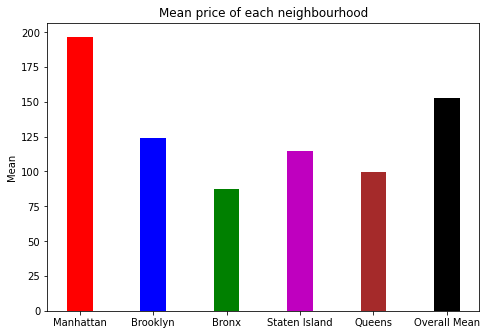

In [65]:
manhattan_mean = nighe_.get_group('Manhattan')['price'].mean()
brooklyn_mean = nighe_.get_group('Brooklyn')['price'].mean()
bronx_mean = nighe_.get_group('Bronx')['price'].mean()
staten_mean = nighe_.get_group('Staten Island')['price'].mean()
queens_mean = nighe_.get_group('Queens')['price'].mean()

width = 0.35
fig = plt.figure()
axs = fig.add_axes([0,0,1,1])
axs.bar('Manhattan', manhattan_mean, width ,color = 'r')
axs.bar('Brooklyn', brooklyn_mean,width , color = 'b')
axs.bar('Bronx', bronx_mean, width,color = 'g')
axs.bar('Staten Island', staten_mean, width, color = 'm')
axs.bar('Queens', queens_mean, width,color =  'brown')
axs.bar('Overall Mean', mean_price, width, color = 'k')
axs.set_ylabel('Mean')
axs.set_title('Mean price of each neighbourhood')

pd.DataFrame(data.groupby('neighbourhood_group')['price'].mean()).sort_values(by = 'price', ascending = False)

as we can see, the mean price is 152.72 per night, 4 out of 5 quarter has a mean price lower than the general mean, and Manhattan has much higer mean price.

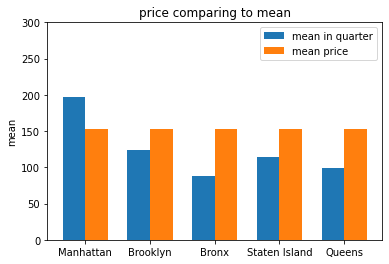

In [67]:
mean_list = [manhattan_mean, brooklyn_mean, bronx_mean, staten_mean, queens_mean]

width = 0.35
X = np.arange(5)

plt.bar(X, mean_list, width, label = 'mean in quarter')
plt.bar(X + width, mean_price, width, label = 'mean price')

plt.ylim(0, 300)
plt.ylabel('mean')
plt.title('price comparing to mean')
plt.xticks(X + width / 2, ('Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens'))
plt.legend(loc = 'best')

Lets find out if the amount of prperties affects the mean price:

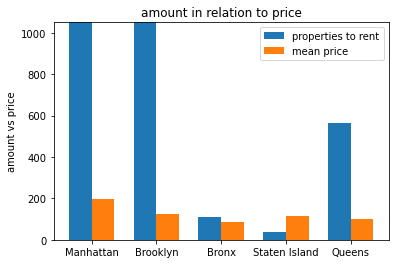

In [28]:
mean_list = [manhattan_mean, brooklyn_mean, bronx_mean, staten_mean, queens_mean]

width = 0.35
X = np.arange(5)

plt.bar(X, niegh_list, width, label = 'properties to rent')
plt.bar(X + width, mean_list, width, label = 'mean price')

plt.ylim(0, 1050)
plt.ylabel('amount vs price')
plt.title('amount in relation to price')
plt.xticks(X + width / 2, ('Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens'))
plt.legend(loc = 'best')

### Conclusions:

* Manhattan and Brooklyn are the most turrists quarters in NYC when the other are more residental.
* The higher the amount of properties to rent, the higer the price goes.
* Despite of it's popularity, Brooklyn's mean price is lower than the avarage price.
*

### cleaning the Data


Now, I can drop the coulmns which doesn't provide any relevant information:

In [30]:
data.drop(columns = ['id','host_id', 'host_name','last_review', 'name'], axis = 1, inplace = True )

In [31]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


Generally, a NaN value in the reviews column means there are no reviews at all, so I'll fill them with the value of 0

In [33]:
data['reviews_per_month'].fillna('0', inplace = True)

In [34]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [93]:
cols = np.array('neighbourhood_group',' neighbourhood', ' room_type')
cols.shape(-1,1)
d_encode = OneHotEncoder()
nyc_encoder = d_encode.fit_transform(cols)

ValueError: only 2 non-keyword arguments accepted

### Splitting into training set and testing set

In [86]:
cols = data.drop('price')
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

KeyError: "['price'] not found in axis"

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(train_set, )

TypeError: 'OrdinalEncoder' object is not subscriptable